In [10]:
!pip install pandas
!pip install numpy
!pip install yellowbrick
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

!pip install kmodes
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

In [12]:
import pandas as pd
tabela = pd.read_excel("Filmesbrpandemia.xlsx")
display(tabela)


,Ano,Titulo,Direção,Gênero,UF,Distribuidora,Público
0,2020,Aos Olhos De Ernesto,Ana Luiza Azevedo,Ficção,RS,Elo Company,334
1,2020,Partida,Caco Ciocler,Documentário,SP/SP,Pandora Filmes,27
2,2020,Fico Te Devendo Uma Carta Sobre O Brasil,Carol Benjamin,Documentário,RJ,Bretz Filmes,156
3,2020,Verlust,Esmir Filho,Ficção,RS,Elo Company,191
4,2020,Sertânia,Geraldo Sarno,Ficção,CE,Bretz Filmes,115
...,...,...,...,...,...,...,...
75,2021,Un Crimen Común,Francisco Márquez,Ficção,SP,Vitrine Filmes,989
76,2021,Você Não É Um Soldado,"Maria Carolina Telles, Aleksei Wrobel Abib",Documentário,SP,Elo Company,24
77,2021,Wandering Heart,Leonardo Esteban Brzezicki Conde,Ficção,SP,Elo Company,20
78,2021,Wild - Rede Selvagem,"Julio Boucada Mauro Inacio Peixoto, Dener Jose...",Documentário,DF,Bretz Filmes,16


In [186]:
##TABELA DE DADOS SOBRE FILMES LANÇADOS DURANTE A PANDEMIA POR 5 DISTRIBUIDORAS ESPEDÍFICAS.

In [13]:
from pandas.core.frame import DataFrame
#Seleção de variáveis
Ano = tabela.Ano
titulo = tabela.Titulo
Direção = tabela.Direção
Gênero = tabela.Gênero
UF = tabela.UF
Distribuidora = tabela.Distribuidora
Público = tabela.Público

C:\Users\laris\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gênero', ylabel='Ano'>

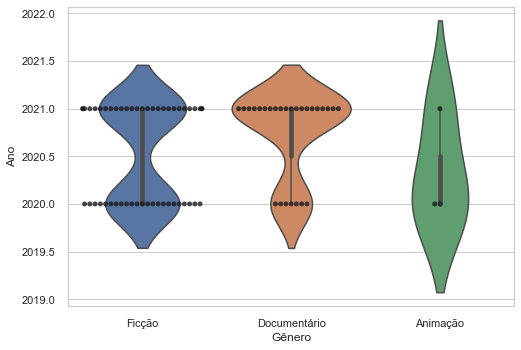

In [14]:
#GÊNERO DE FILMES BRASILEIROS LANÇADOS DURANTE A PANDEMIA
sns.violinplot(x=Gênero, y=Ano)
sns.swarmplot(x=Gênero, y=Ano, color="k", alpha=0.8)

C:\Users\laris\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\laris\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\laris\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='UF', ylabel='Ano'>

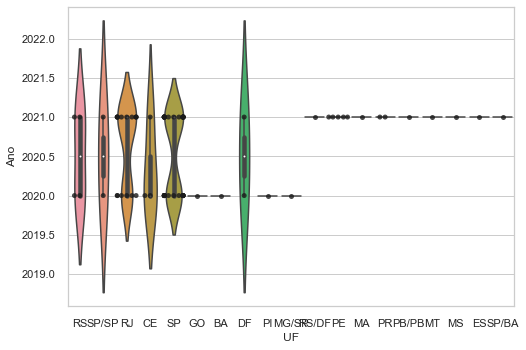

In [15]:
#FILMES BRASILEIROS LANÇADOS DURANTE A PANDEMIA POR ESTADO
sns.violinplot(x=UF, y=Ano)
sns.swarmplot(x=UF, y=Ano, color="k", alpha=0.8)

<AxesSubplot:xlabel='Distribuidora', ylabel='Ano'>

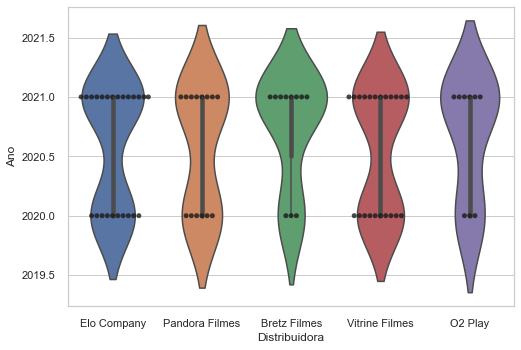

In [16]:
#FILMES BRASILEIROS LANÇADOS DURANTE A PANDEMIA POR DISTRIBUIDORA
sns.violinplot(x=Distribuidora, y=Ano)
sns.swarmplot(x=Distribuidora, y=Ano, color="k", alpha=0.8)

C:\Users\laris\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Distribuidora', ylabel='Público'>

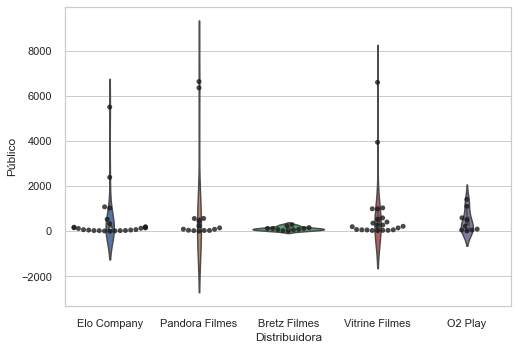

In [17]:
#PÚBLICO ALCANÇADO DURANTE A PANDEMIA POR DISTRIBUIDORA
sns.violinplot(x=Distribuidora, y=Público)
sns.swarmplot(x=Distribuidora, y=Público, color="k", alpha=0.8)

<AxesSubplot:xlabel='Gênero', ylabel='Público'>

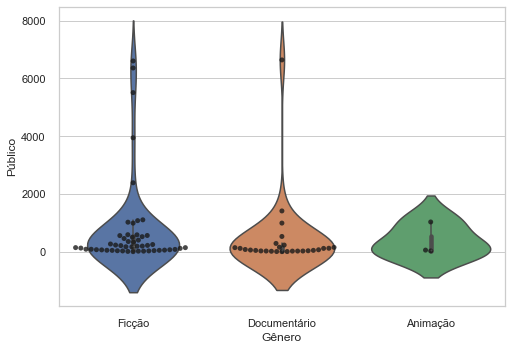

In [18]:
#GÊNERO DE FILMES BRASILEIROS ALCANÇADOS POR PÚBLICO DURANTE A PANDEMIA
sns.violinplot(x=Gênero, y=Público)
sns.swarmplot(x=Gênero, y=Público, color="k", alpha=0.8)

<AxesSubplot:xlabel='Ano', ylabel='Público'>

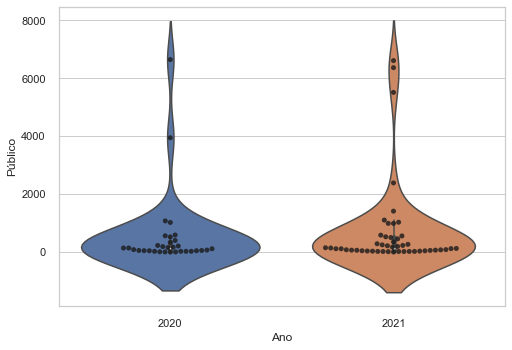

In [19]:
#PÚBLICO ALCANÇADO PELOS FILMES BRASILEIROS DURANTE A PANDEMIA
sns.violinplot(x=Ano, y=Público)
sns.swarmplot(x=Ano, y=Público, color="k", alpha=0.8)

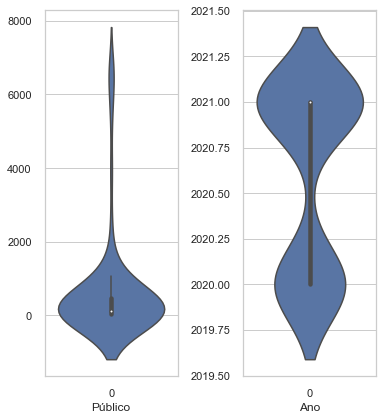

In [20]:
#DISTRIBUIÇÃO DE PÚBLICO ALCANÇADO PELO CINEMA BRASILEIRO DURANTE A PANDEMIA

fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 6)

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=Público)
ax.set_xlabel("Público")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=Ano)
ax.set_xlabel("Ano")


fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Gênero', ylabel='Ano'>

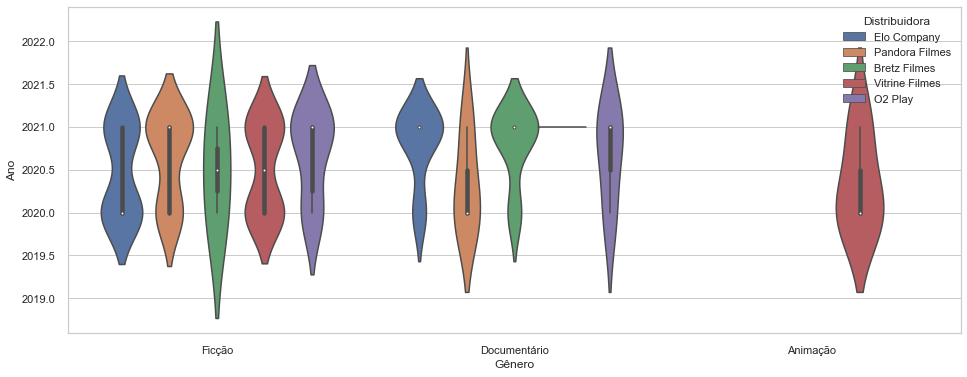

In [21]:
#DISTRIBUIÇÃO DE GÊNERO LANÇADO POR DISTRIBUIDORA DURANTE A PANDEMIA
fig = plt.figure(figsize=(16, 6))
sns.violinplot(x=Gênero, y=Ano, hue=Distribuidora)

<AxesSubplot:xlabel='UF', ylabel='Ano'>

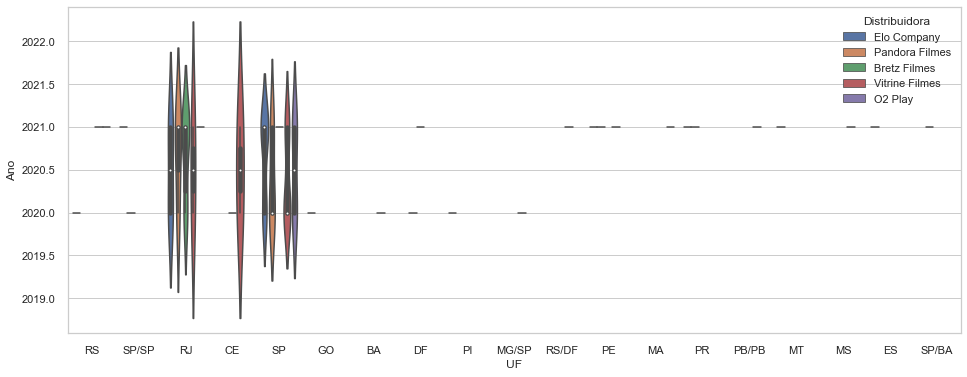

In [22]:
##DISTRIBUIÇÃO DE FILMES PRODUZIDOS EM DETERMINADOS ESTADOS PELAS PRODUTORAS DURANTE A PANDEMIA
fig = plt.figure(figsize=(16, 6))
sns.violinplot(x=UF, y=Ano, hue=Distribuidora)

<AxesSubplot:xlabel='Gênero', ylabel='Público'>

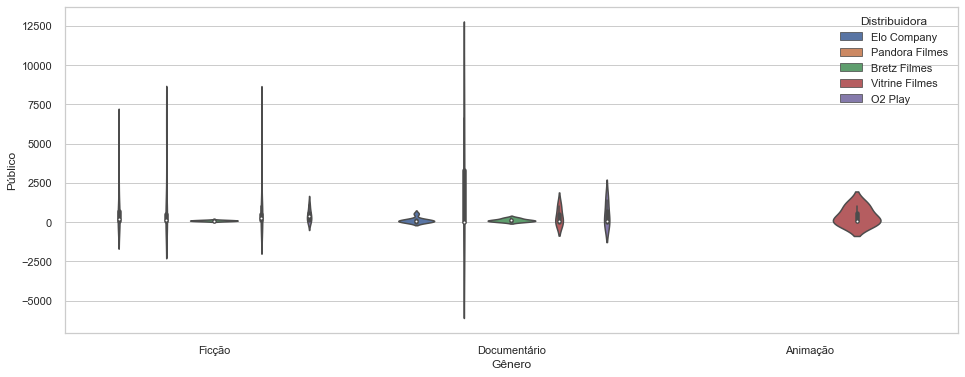

In [23]:
##PÚBLICO ALCANÇADO POR GÊNERO PELAS PRODUTORAS DURANTE A PANDEMIA
fig = plt.figure(figsize=(16, 6))
sns.violinplot(x=Gênero, y=Público, hue=Distribuidora)

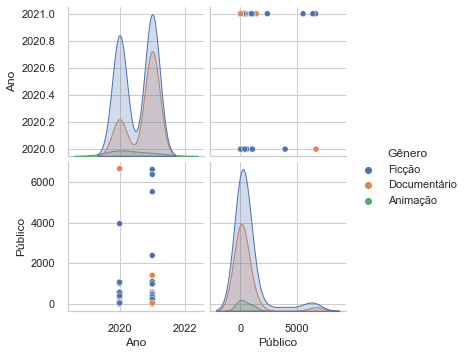

In [24]:
tabela = pd.read_excel("Filmesbrpandemia.xlsx")
sns.pairplot(tabela, hue = 'Gênero')

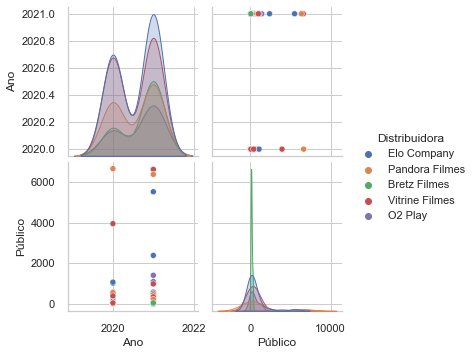

In [25]:
tabela = pd.read_excel("Filmesbrpandemia.xlsx")
sns.pairplot(tabela, hue = 'Distribuidora')

Text(186.28999999999996, 0.5, 'Distribuidora')

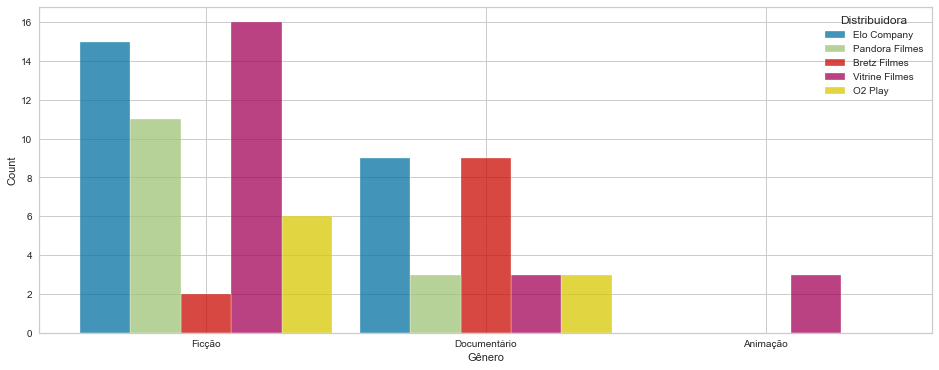

In [158]:
fig = plt.figure(figsize=(16, 6))
sns.histplot(x=Gênero, hue=Distribuidora, multiple="dodge", shrink=.9)
ax.set_ylabel("Distribuidora")

Text(186.47750000000005, 0.5, 'Público')

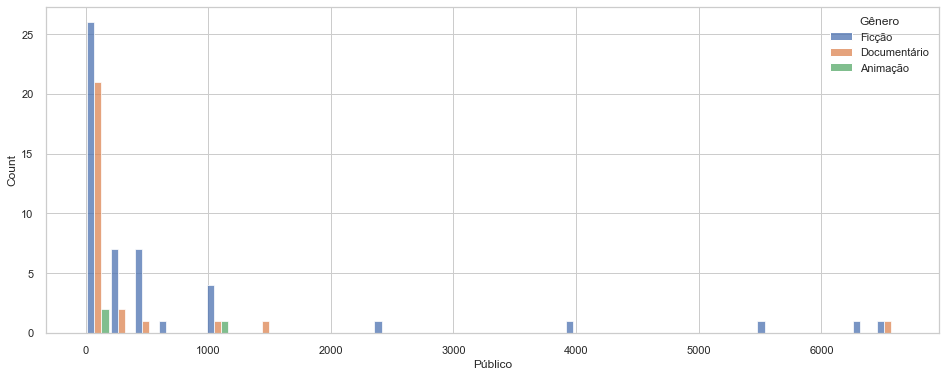

In [26]:
fig = plt.figure(figsize=(16, 6))
sns.histplot(x=Público, hue=Gênero, multiple="dodge", shrink=.9)
ax.set_ylabel("Público")

Text(186.47750000000005, 0.5, 'Distribuidora')

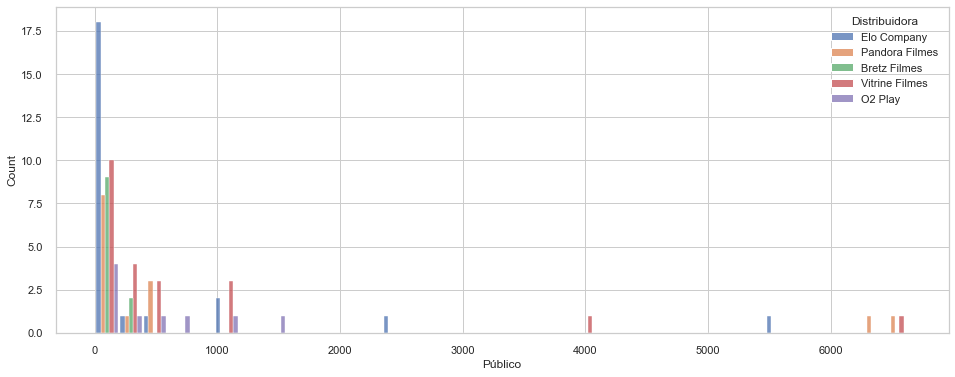

In [27]:
fig = plt.figure(figsize=(16, 6))
sns.histplot(x=Público, hue=Distribuidora, multiple="dodge", shrink=.9)
ax.set_ylabel("Distribuidora")

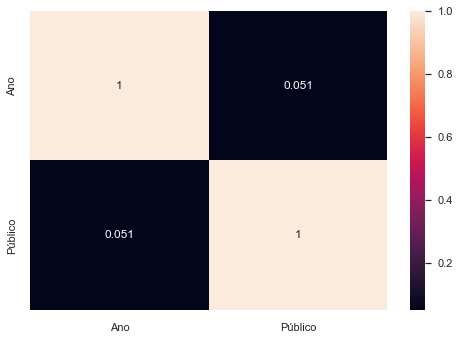

In [28]:
sns.heatmap(tabela.corr(),annot=True);

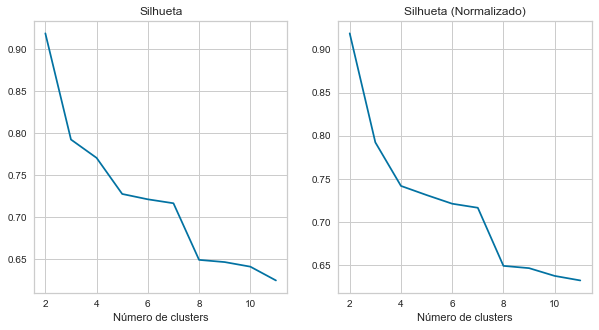

In [168]:
from sklearn.metrics import silhouette_score, silhouette_samples
tabela = pd.read_excel("Filmesbrpandemia.xlsx")

tabela = tabela.loc[:,['Ano','Público']]
sil = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    sil.append(silhouette_score(tabela, km.labels_))

silNorm = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    silNorm.append(silhouette_score(tabela, km.labels_))
    
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(range(2, 12), sil)
ax1.set_title("Silhueta")
ax1.set_xlabel("Número de clusters")
ax2.plot(range(2, 12), silNorm)
ax2.set_title("Silhueta (Normalizado)")
ax2.set_xlabel("Número de clusters")
plt.show()

[[ 1.00000000e+00  1.02026213e-01]
 [-1.11022302e-16  7.96832630e-02]]


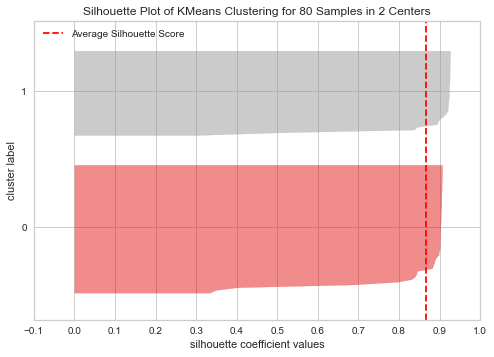

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 80 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=2, random_state=42))

In [169]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(2, random_state=42), X)

[[1.         0.04700546]
 [0.         0.03186703]
 [1.         0.92733755]
 [0.         0.79692679]]


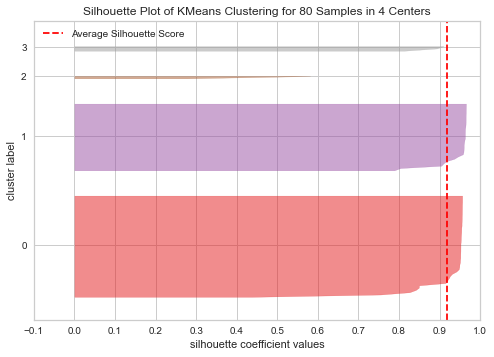

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 80 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4, random_state=42))

In [170]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(4, random_state=42), X)

[[1.         0.02372123]
 [0.         0.03186703]
 [1.         0.92733755]
 [0.         1.        ]
 [0.         0.59385357]
 [1.         0.19835292]]


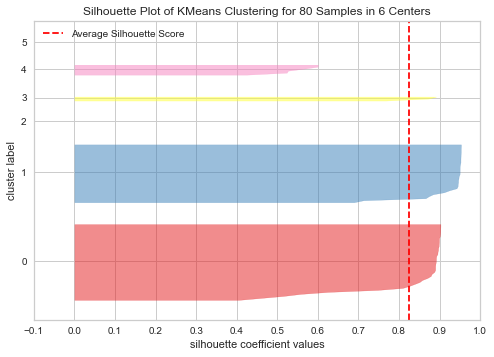

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 80 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=6, random_state=42))

In [172]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(6, random_state=42), X)

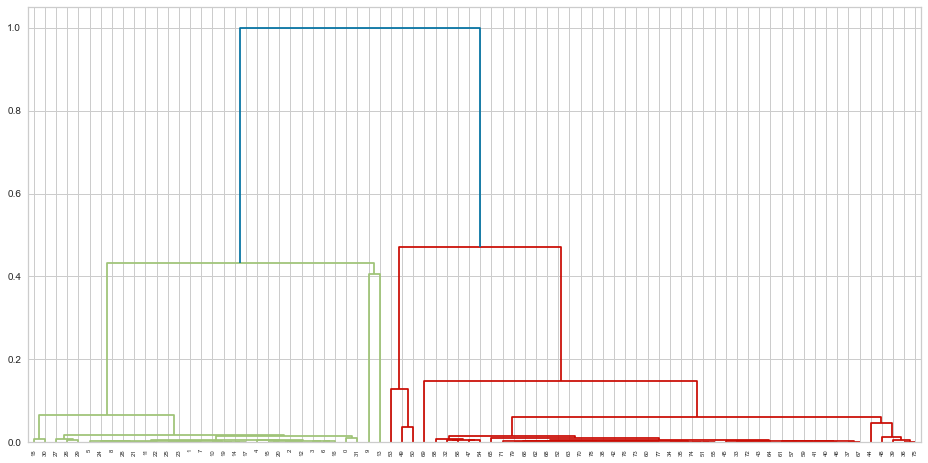

In [173]:
# Com o número de variáveis reduzido:

from scipy.cluster import hierarchy 

labels = hierarchy.linkage(X) 
plt.figure(figsize=(16,8)) 

dn = hierarchy.dendrogram(labels) 

In [30]:
tabela.head()

,Ano,Titulo,Direção,Gênero,UF,Distribuidora,Público
0,2020,Aos Olhos De Ernesto,Ana Luiza Azevedo,Ficção,RS,Elo Company,334
1,2020,Partida,Caco Ciocler,Documentário,SP/SP,Pandora Filmes,27
2,2020,Fico Te Devendo Uma Carta Sobre O Brasil,Carol Benjamin,Documentário,RJ,Bretz Filmes,156
3,2020,Verlust,Esmir Filho,Ficção,RS,Elo Company,191
4,2020,Sertânia,Geraldo Sarno,Ficção,CE,Bretz Filmes,115


In [43]:
tabela = pd.read_excel("Filmesbrpandemia.xlsx")
tab1 = pd.DataFrame(tabela)
tab1.drop('Ano', inplace=True, axis=1)
tab1.drop('Público', inplace=True, axis=1)
tab1.drop('Titulo', inplace=True, axis=1)


tab1.head()

,Direção,Gênero,UF,Distribuidora
0,Ana Luiza Azevedo,Ficção,RS,Elo Company
1,Caco Ciocler,Documentário,SP/SP,Pandora Filmes
2,Carol Benjamin,Documentário,RJ,Bretz Filmes
3,Esmir Filho,Ficção,RS,Elo Company
4,Geraldo Sarno,Ficção,CE,Bretz Filmes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 209.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 183.0
Run 1, iteration: 2/100, moves: 9, cost: 180.0
Run 1, iteration: 3/100, moves: 3, cost: 180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 

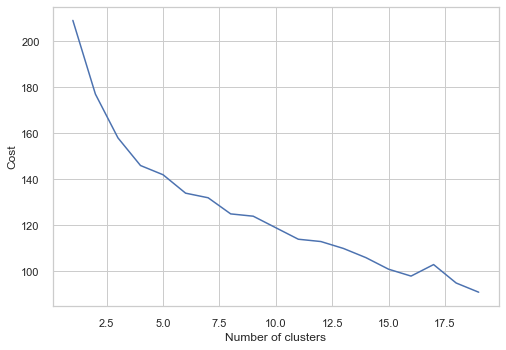

In [44]:
# Cotovelo Kmodes
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(tab1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
# plt.title('Método do cotovelo')
plt.show()

In [52]:
data = tab1

km = KModes(n_clusters=3, init='huang', n_init=10, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18, cost: 165.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 175.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 15, cost: 167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, mov

In [46]:
data = tab1

km = KModes(n_clusters=8, init='huang', n_init=10, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 126.0
Run 1, iteration: 2/100, moves: 2, cost: 126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 142.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 4, cost: 123.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 4, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Start

In [54]:
data = tab1

km = KModes(n_clusters=11, init='huang', n_init=10, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 120.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 121.0
Run 2, iteration: 2/100, moves: 3, cost: 121.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10, cost: 130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 123.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 9, cost: 138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 10, cost: 115.0
Init: initializing centroids
Init: initializing clusters
Star

In [55]:
data = tab1

km = KModes(n_clusters=16, init='huang', n_init=10, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 109.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 6, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 4, cost: 102.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: